# Matrix Factorization

## LU decomposition

The $LU$ decomposition decomposes a matrix into a lower triangular matrix $L$ and an upper triangular matrix $U$. Its main application is solving linear systems. Therefore, solving the linear system $Ax = b$ where $A$ is a $n\times n$ matrix and $x$ and $b$ are vectors of length $n$ can be as represented as follows.

\begin{align*}\label{C7_liner_eq}
Ax=(LU)x=L(Ux)=b,
\end{align*}
This is equivalent to
\begin{align*}
\begin{cases}
Ly = b,\\
Ux = y.
\end{cases}
\end{align*}
Solving the last two linear systems is equivalent to the forward elimination and back substitution, respectively.

```{admonition} Theorem



Let $A = (a_{ij})$ be an $n\times n$ matrix, where $1\leq i,j \leq n$, and let all of its diagonal submatrices of order $k$ be nonsingular. We can assert the existence of matrices $L$ and $U$ satisfying the following conditions: $L$ is a lower triangular matrix with ones along its diagonal, $U$ is an upper triangular matrix, and $A = LU$ {cite:ps}`atkinson2004introduction, khoury2016numerical, allaire2008numerical`.
```

Let $A$ be a square matrix. Then, $A$ can be decomposed into $L$ and $U$ as follows,
\begin{align*}
\begin{bmatrix}a_{11} & a_{12} & \dots & a_{1n} \\ a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots &   & \vdots \\ a_{n1} & a_{n2} & \dots & a_{nn} \end{bmatrix}=
\begin{bmatrix}1 & 0 & \dots & 0 \\ l_{21} & 1 & \dots & 0 \\
\vdots & \vdots &   & \vdots \\ l_{n1} & l_{n2} & \dots & 1 \end{bmatrix}
\begin{bmatrix}u_{11} & u_{12} & \dots & u_{1n} \\ 0 & u_{22} & \dots & u_{2n} \\
\vdots & \vdots &   & \vdots \\ 0 & 0 & \dots & u_{nn} \end{bmatrix}.
\end{align*}

Observe that $L$ is lower triangular and $U$ upper triangular. Thus,

\begin{align*}
a_{ij} = \sum_{k = 1}^{n} l_{ik} u_{kj} = \sum_{k = 1}^{\min(i,j)} l_{ik} u_{kj}, \quad 1\leq i,j\leq n.
\end{align*}

Solving this system:

* **Column 1.** Set $j = 1$ and for $1\leq i\leq n$, we have,
\begin{align*}
\begin{array}{lcl}
a_{11} = l_{11}\,u_{11} & \Rightarrow & u_{11} = a_{11},\\
a_{21} = l_{21}\,u_{11}& \Rightarrow & l_{21} = u_{21}/a_{11},\\
\vdots &  & \vdots\\
a_{n1} = l_{n1}\,u_{11}& \Rightarrow & l_{n1} = u_{n1}/a_{11},
\end{array}
\end{align*}
* **Column j.** For a fixed $j$ and for $1\leq i\leq n$, we have,
\begin{align*}
\begin{array}{lcl}
a_{1j} = l_{11}\,u_{1j} & \Rightarrow & u_{1j} = a_{1j},\\
a_{21} = l_{21}\,u_{1j} + l_{22}\,u_{2j} & \Rightarrow & u_{2j} = a_{2j} - a_{21}\,a_{1j} ,\\
\vdots &  & \vdots\\
a_{jj} = l_{j1}\,u_{1j} + \ldots + l_{jj}\,u_{jj} & \Rightarrow & u_{jj} = a_{jj} - \sum_{k = 1}^{j-1} l_{jk}\,u_{kj},\\
a_{j+1,j} = l_{j+1,1}\,u_{1j} + \ldots + l_{j+1,j}\,u_{jj} & \Rightarrow & l_{j+1,j} = \frac{1}{u_{jj}}
\left( a_{j+1,j} - \sum_{k = 1}^{j-1} l_{j+1,k}\,u_{kj} \right),\\
\vdots &  & \vdots\\
a_{nj} = l_{n,1}\,u_{1j} + \ldots + l_{nj}\,u_{jj} & \Rightarrow & l_{n,j} = \frac{1}{u_{jj}}
\left( a_{nj} - \sum_{k = 1}^{j-1} l_{nk}\,u_{kj} \right).
\end{array}
\end{align*}

Thus, $u_{ij}$ and $l_{ij}$ can be identified as follows
\begin{align*}
u_{ij} &= a_{ij} - \sum_{k=1}^{i-1} u_{kj}l_{ik},\\
l_{ij} &=  \frac{1}{u_{jj}} \left(a_{ij} - \sum_{k=1}^{j-1} u_{kj}l_{ik} \right).
\end{align*}

See [1] for the full derivation of this algorithm.

::::{tab-set}

:::{tab-item} Python Code
```python
import numpy as np

def myLU(A):
    '''
    Assuming that no row interchanges are required, this function
    calculates a unit lower triangular matrix L, and an upper
    triangular matrix U such that LU = A

    Parameters
    ----------
    A : numpy array
        DESCRIPTION. Matrix A

    Returns
    -------
    L : numpy array
        DESCRIPTION. Matrix L from A = LU
    U : numpy array
        DESCRIPTION. Matrix U from A = LU

    '''
    
    n = A.shape[1]
    # Consider U as a copy matrix A
    U = A.copy().astype(float)
    
    for j in range(0, n-1):
        U[j+1:n,j] = U[j+1:n,j]/U[j,j];
        for i in range(j+1, n):
            U[i,j+1:n] = U[i,j+1:n]-U[i,j]*U[j,j+1:n]
    L = np.tril(U,-1)+ np.eye(n, dtype=float)
    U = np.triu(U)
    return L, U
```
:::

:::{tab-item} MATLAB Code
```MATLAB
function [L,U] = myLU(A)
%{
Assuming that no row interchanges are required, this function
calculates a unit lower triangular matrix L, and an upper
triangular matrix U such that LU = A

Parameters
----------
A : array
    DESCRIPTION. Matrix A

Returns
-------
L : array
    DESCRIPTION. Matrix L from A = LU
U : array
    DESCRIPTION. Matrix U from A = LU
%}
n=length(A);
U = A;
for j=1:n-1
    U(j+1:n,j)= U(j+1:n,j)/U(j,j);
    for i=j+1:n
        U(i,j+1:n)=U(i,j+1:n)-U(i,j)*U(j,j+1:n);
    end
end
L = tril(U,-1)+eye(n,n);
U = triu(U);
end
```
:::

::::

In [1]:
import sys
sys.path.insert(0,'..')
import hd_tools as hd

Loading BokehJS ...

<font color='Blue'><b>Example</b></font>: Apply $LU$ decomposition on the following matrix and identify $L$ and $U$.
\begin{align*}A = \left[\begin{array}{cccc} 7 & 3 & -1 & 2\\ 3 & 8 & 1 & -4\\ -1 & 1 & 4 & -1\\ 2 & -4 & -1 & 6 \end{array}\right].\end{align*}

<font color='Green'><b>Solution</b></font>: We have,

In [2]:
import numpy as np
from hd_Matrix_Decomposition import myLU
from IPython.display import display, Latex
from sympy import init_session, init_printing, Matrix

A = np.array([ [7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6] ])
L, U = myLU(A)
display(Latex(r'L ='), Matrix(np.round(L, 2)))
display(Latex(r'U ='), Matrix(np.round(U, 2)))
display(Latex(r'LU ='), Matrix(L@U))

<IPython.core.display.Latex object>

Matrix([
[  1.0,     0,    0,   0],
[ 0.43,   1.0,    0,   0],
[-0.14,  0.21,  1.0,   0],
[ 0.29, -0.72, 0.09, 1.0]])

<IPython.core.display.Latex object>

Matrix([
[7.0,  3.0, -1.0,   2.0],
[  0, 6.71, 1.43, -4.86],
[  0,    0, 3.55,  0.32],
[  0,    0,    0,  1.89]])

<IPython.core.display.Latex object>

Matrix([
[ 7.0,  3.0, -1.0,  2.0],
[ 3.0,  8.0,  1.0, -4.0],
[-1.0,  1.0,  4.0, -1.0],
[ 2.0, -4.0, -1.0,  6.0]])

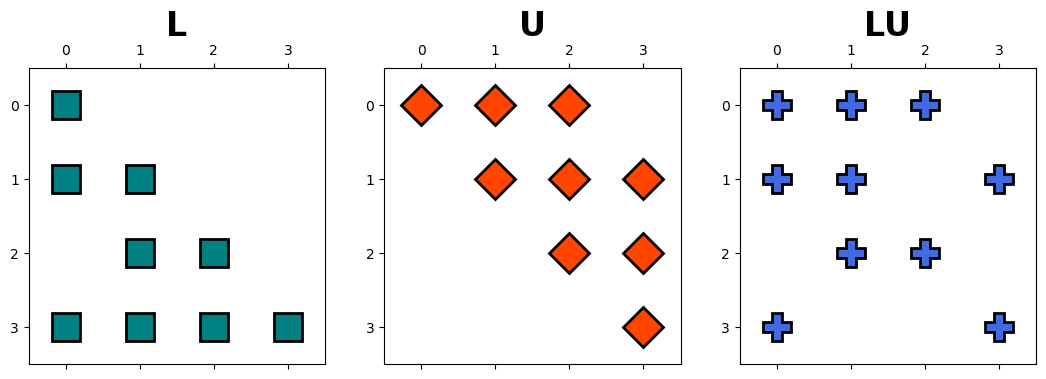

In [10]:
hd.matrix_decomp_fig(mats = [L, U, L@U], labels = ['L', 'U', 'LU'])

Note that we could get similar results using Scipy LU function, [```scipy.linalg.lu```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html).

In [4]:
import scipy.linalg as linalg
P, L, U = linalg.lu(A)
display(Latex(r'L ='), Matrix(np.round(L, 2)))
display(Latex(r'U ='), Matrix(np.round(U, 2)))

<IPython.core.display.Latex object>

Matrix([
[  1.0,     0,    0,   0],
[ 0.43,   1.0,    0,   0],
[-0.14,  0.21,  1.0,   0],
[ 0.29, -0.72, 0.09, 1.0]])

<IPython.core.display.Latex object>

Matrix([
[7.0,  3.0, -1.0,   2.0],
[  0, 6.71, 1.43, -4.86],
[  0,    0, 3.55,  0.32],
[  0,    0,    0,  1.89]])

Note that in the above algorithm $P$ is a permutation matrix that can perform a **partial** and **full pivoting**.

## Solving Linear systems using LU decomposition

We can solve the linear system $Ax=b$ for $x$ using $LU$ decomposition. To demonstrate this, we use the following example,

<font color='Blue'><b>Example</b></font>:
Solve the following linear system using $LU$ decomposition.
\begin{align*}
\begin{cases}
2\,x_{1}+x_{2}+x_{3}=7\\ x_{1}-2\,x_{2}+x_{4}=1\\ x_{2}+3\,x_{3}=11\\ 4\,x_{4}-x_{1}=15.
\end{cases}
\end{align*}

<font color='Green'><b>Solution</b></font>:

Let $A=\left[\begin{array}{cccc}2 & 1 & 1 & 0\\ 1 & -2 & 0 & 1\\ 0 & 1 & 3 & 0\\ -1 & 0 & 0 & 4 \end{array}\right]$
and $b=\left[\begin{array}{c} 7\\ 1\\ 11\\ 15 \end{array}\right]$.

Then, this linear system can be also expressed as follows,
\begin{align*}
Ax=(LU)x=L(Ux)=b.
\end{align*}
We have,

In [5]:
A = np.array([[2,1,1,0],[1,-2,0,1],[0,1,3,0],[-1,0,0,4]])
b = np.array([[7],[1],[11],[15]])
L, U = myLU(A)
display(Latex(r'L ='), Matrix(np.round(L, 2)))
display(Latex(r'U ='), Matrix(np.round(U, 2)))

<IPython.core.display.Latex object>

Matrix([
[ 1.0,    0,    0,   0],
[ 0.5,  1.0,    0,   0],
[   0, -0.4,  1.0,   0],
[-0.5, -0.2, 0.14, 1.0]])

<IPython.core.display.Latex object>

Matrix([
[2.0,  1.0,  1.0,    0],
[  0, -2.5, -0.5,  1.0],
[  0,    0,  2.8,  0.4],
[  0,    0,    0, 4.14]])

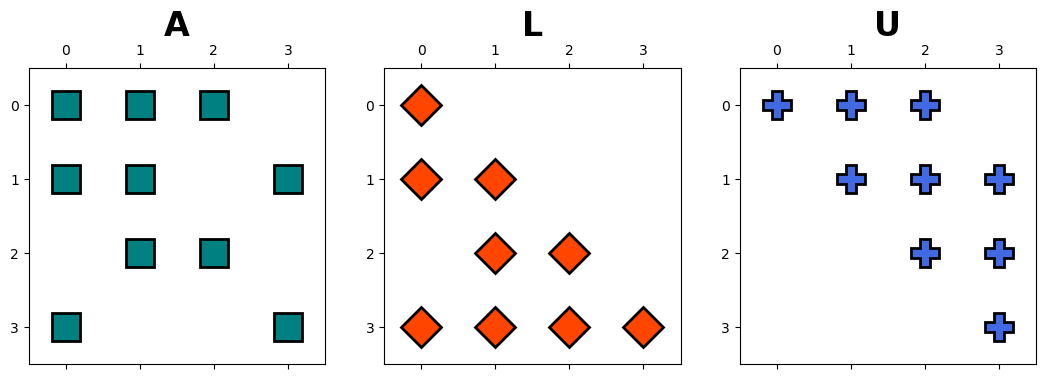

In [6]:
hd.matrix_decomp_fig(mats = [A, L, U], labels = ['A', 'L', 'U'])

Now, we can solve the following linear systems instead
\begin{align*}
\begin{cases}
Ly=b,\\
Ux=y.
\end{cases}.
\end{align*}

In [7]:
# solving Ly=b for y
y = linalg.solve(L, b)
display(Latex(r'y ='), Matrix(np.round(y, 2)))

<IPython.core.display.Latex object>

Matrix([
[  7.0],
[ -2.5],
[ 10.0],
[16.57]])

In [8]:
# solving Ux=y for x
x = linalg.solve(U, y)
display(Latex(r'x ='), Matrix(np.round(x, 2)))

<IPython.core.display.Latex object>

Matrix([
[1.0],
[2.0],
[3.0],
[4.0]])

Let's now solve the linear system directly and compare the results.

In [9]:
x_new = linalg.solve(A, b)
display(Latex(r'x ='), Matrix(np.round(x_new, 2)))

<IPython.core.display.Latex object>

Matrix([
[1.0],
[2.0],
[3.0],
[4.0]])